Assignment 4

Elbow method to find number of optimal clusters form dataset. 

In [1]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

In [2]:
# Create Spark session
spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()

In [3]:
# Read input data
data = spark.read.csv("KmeansData.csv", header=True, inferSchema=True)

In [4]:
data.show()

+---+-------------------+----------+-------+------+-------+------+---------+----------+---------+-----+
|_c0|            country|child_mort|exports|health|imports|income|inflation|life_expec|total_fer| gdpp|
+---+-------------------+----------+-------+------+-------+------+---------+----------+---------+-----+
|  0|        Afghanistan|      90.2|   10.0|  7.58|   44.9|  1610|     9.44|      56.2|     5.82|  553|
|  1|            Albania|      16.6|   28.0|  6.55|   48.6|  9930|     4.49|      76.3|     1.65| 4090|
|  2|            Algeria|      27.3|   38.4|  4.17|   31.4| 12900|     16.1|      76.5|     2.89| 4460|
|  3|             Angola|     119.0|   62.3|  2.85|   42.9|  5900|     22.4|      60.1|     6.16| 3530|
|  4|Antigua and Barbuda|      10.3|   45.5|  6.03|   58.9| 19100|     1.44|      76.8|     2.13|12200|
|  5|          Argentina|      14.5|   18.9|   8.1|   16.0| 18700|     20.9|      75.8|     2.37|10300|
|  6|            Armenia|      18.1|   20.8|   4.4|   45.3|  670

In [5]:
# Select only feature columns
feature_cols = data.columns[2:-2]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data).select("features")

In [6]:
# Initialize empty lists for WSSSE and Silhouette scores
wssse_list = []
silhouette_scores = []

In [7]:
# Loop over different values of k to find the optimal number of clusters
for k in range(2, 11):
    # Fit KMeans model
    kmeans = KMeans(k=k, seed=2)
    model = kmeans.fit(data)
    predictions = model.transform(data)
    
    # Calculate within-cluster sum of squared errors (WSSSE)
    wssse = model.summary.trainingCost
    wssse_list.append(wssse)
    
    # Calculate Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette_score = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette_score)

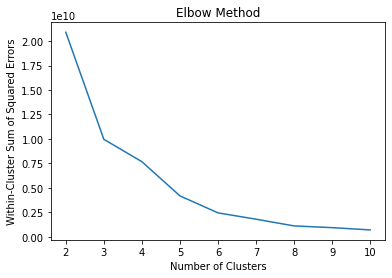

In [8]:
# Plot the WSSSE vs. number of clusters
plt.plot(range(2, 11), wssse_list)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squared Errors")
plt.show()

Since there are more bends in the Elbow method plot to find optimal curve we can find the Silhouette score.

Silhouette score:Measures how well each data point fits into its assigned cluster compared to other clusters 


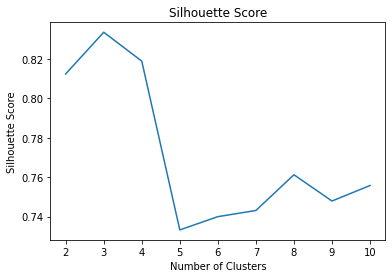

In [9]:
# Plot the Silhouette score vs. number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

While a high silhouette score at a certain number of clusters and an elbow bend at the same number of clusters may suggest an optimal number of clusters.(if we neglect the other parameters)